In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('la-crimes-sample.csv')

In [3]:
print('{0:^25} {1:^10} {2:^10} {3:^10}'.format("Name","Type","Unique","Null"))
print('{0:-^25} {1:-^10} {2:-^10} {3:-^10}'.format("","","",""))
for column in data.columns:
    print('{0:25} {1:^10} {2:^10} {3:^10}'.format(column,str(data[column].dtype),len(data[column].unique()),data[column].isna().sum()))
print('\nCount columns: {0}, Count rows: {1}'.format(len(data.columns),len(data.index)))

          Name               Type      Unique      Null   
------------------------- ---------- ---------- ----------
Unnamed: 0                  int64      39608        0     
DR Number                   int64      39608        0     
Date Reported               object      2809        0     
Date Occurred               object      2808        0     
Time Occurred               int64       900         0     
Area ID                     int64        21         0     
Area Name                   object       21         0     
Reporting District          int64       1135        0     
Crime Code                  int64       115         0     
Crime Code Description      object      114         7     
MO Codes                    object     14020       4291   
Victim Age                 float64       91        3220   
Victim Sex                  object       5         3631   
Victim Descent              object       18        3632   
Premise Code               float64      190         3   

15.0    1026
25.0     966
27.0     911
23.0     906
24.0     898
Name: Victim Age, dtype: int64

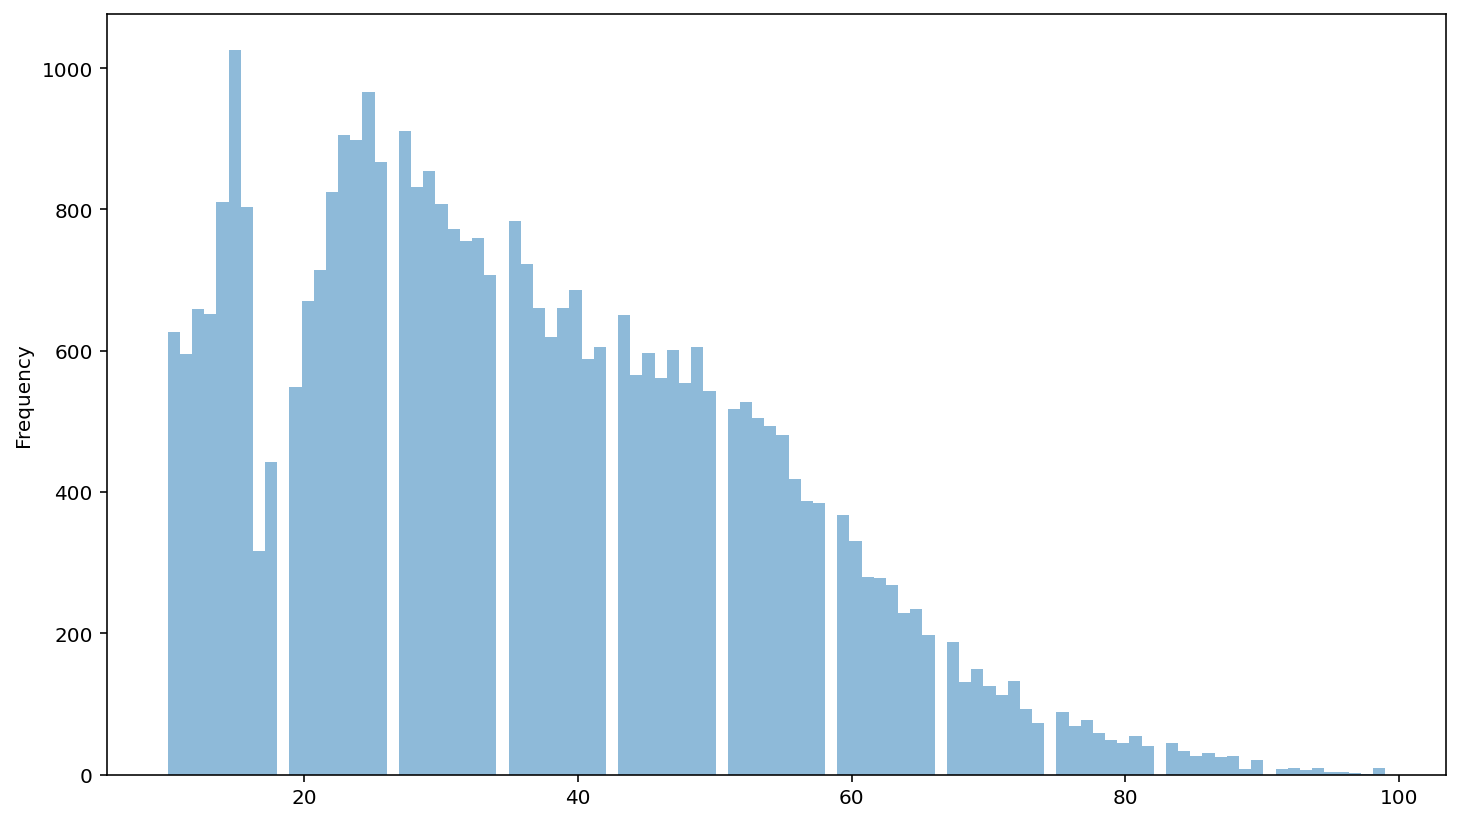

In [4]:
data["Victim Age"].plot.hist(bins=100, alpha=0.5) #Гистограмма жертв по возрасту
data["Victim Age"].value_counts().head() #В 15 лет чаще становятся жертвами

In [5]:
data["Victim Sex"].value_counts() #Мужчины чаще становятся жертвами

M    18564
F    16792
X      619
H        2
Name: Victim Sex, dtype: int64

In [6]:
male = data[data["Victim Sex"]=="M"]
female = data[data["Victim Sex"]=="F"]

29.0    433
25.0    423
27.0    415
32.0    406
28.0    403
Name: Victim Age, dtype: int64

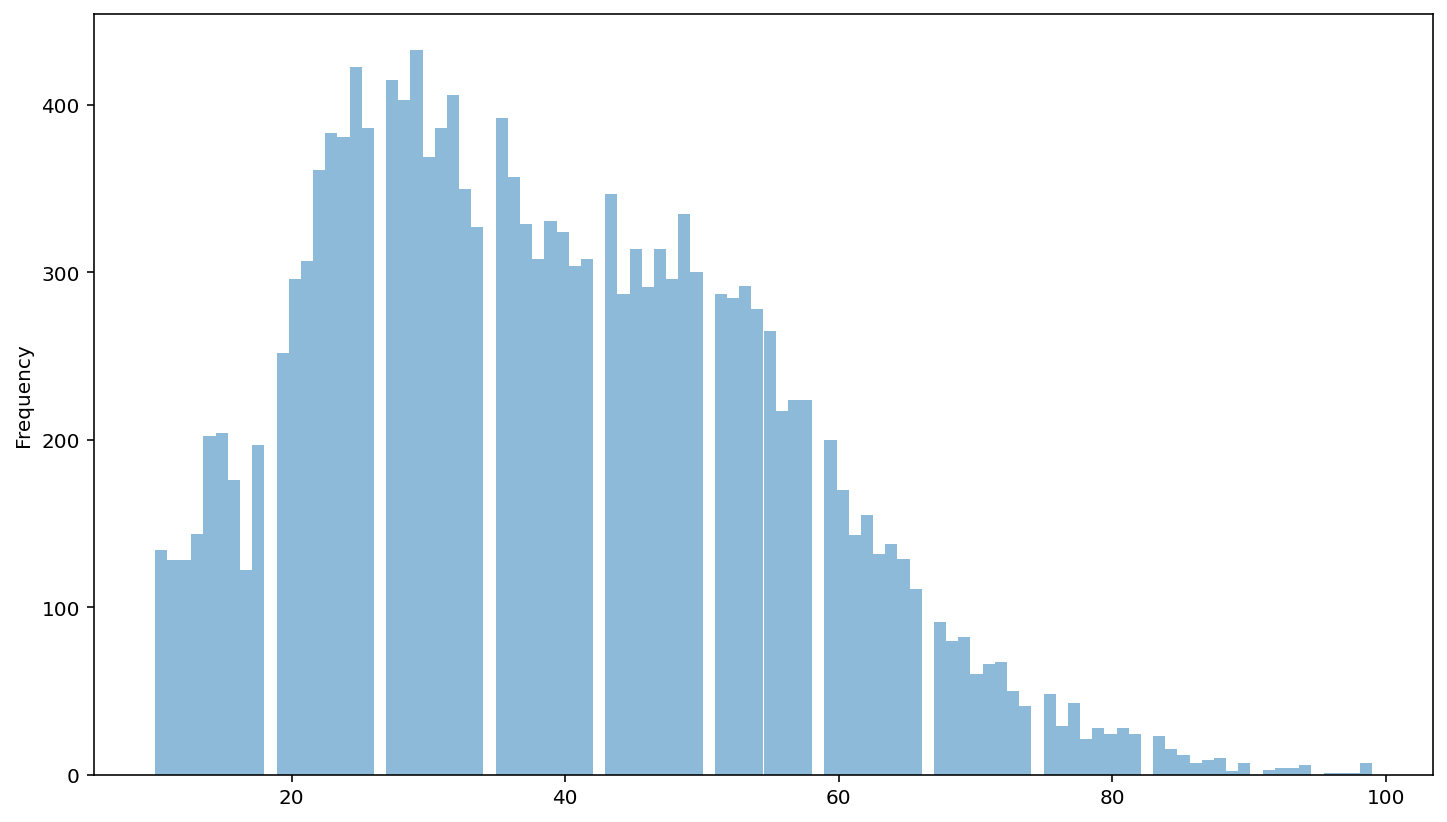

In [7]:
male["Victim Age"].plot.hist(bins=100, alpha=0.5) #Гистограмма сжертв по возрасту по мужчинам
male["Victim Age"].value_counts().head() #В 29 лет мужчины чаще становятся жертвами

25.0    543
23.0    523
24.0    515
27.0    496
26.0    481
Name: Victim Age, dtype: int64

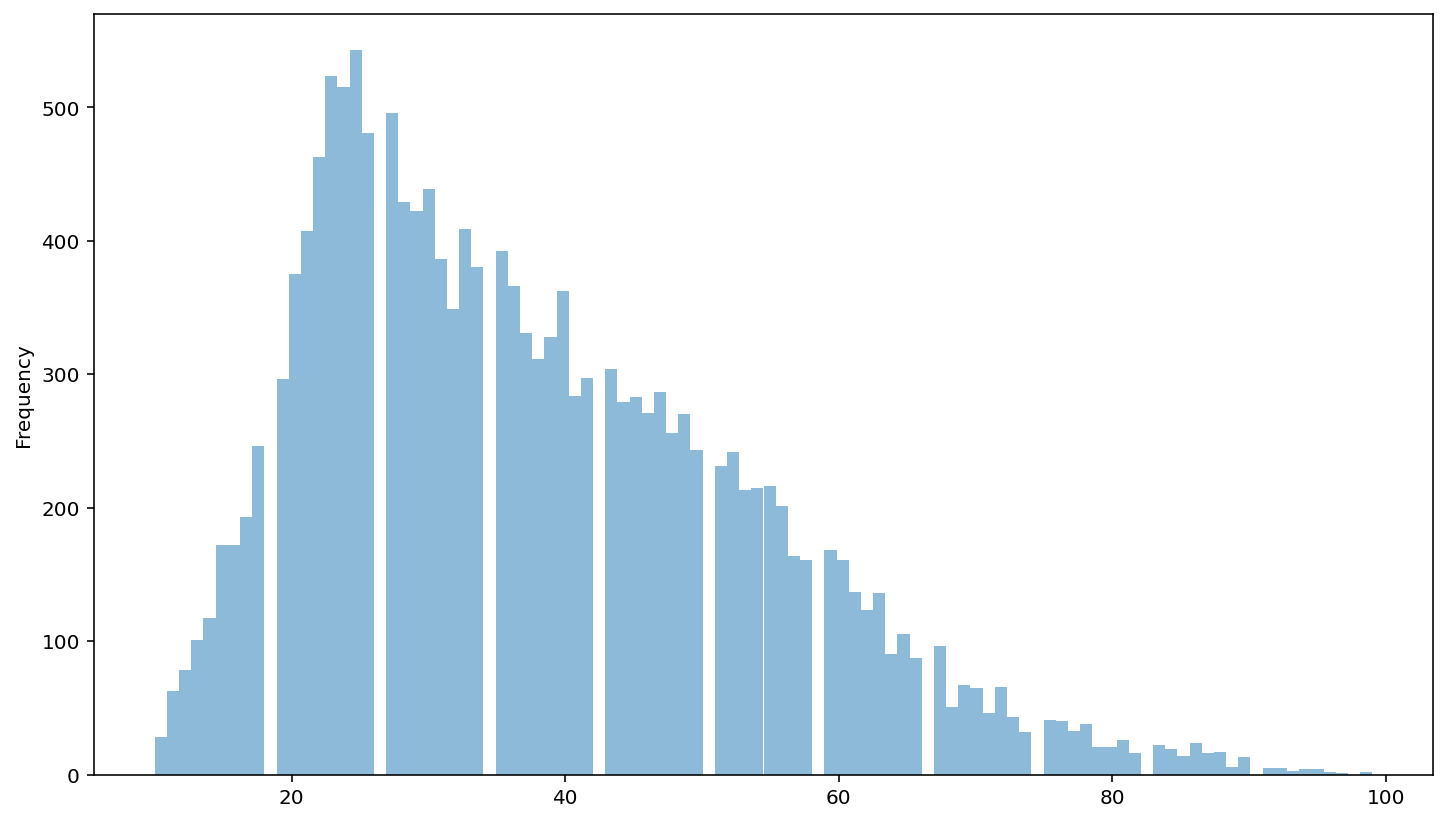

In [8]:
female["Victim Age"].plot.hist(bins=100, alpha=0.5) #Гистограмма жертв по возрасту по женщинам
female["Victim Age"].value_counts().head() #В 25 лет женщины чаще становятся жертвами

In [9]:
data["Crime Code Description"].value_counts().iloc[:10] #10 самых распространенных преступлений

BATTERY - SIMPLE ASSAULT                                        3581
VEHICLE - STOLEN                                                3048
BURGLARY FROM VEHICLE                                           3038
BURGLARY                                                        2938
THEFT PLAIN - PETTY ($950 & UNDER)                              2866
THEFT OF IDENTITY                                               2522
INTIMATE PARTNER - SIMPLE ASSAULT                               2147
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114    2027
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                        1759
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                  1656
Name: Crime Code Description, dtype: int64

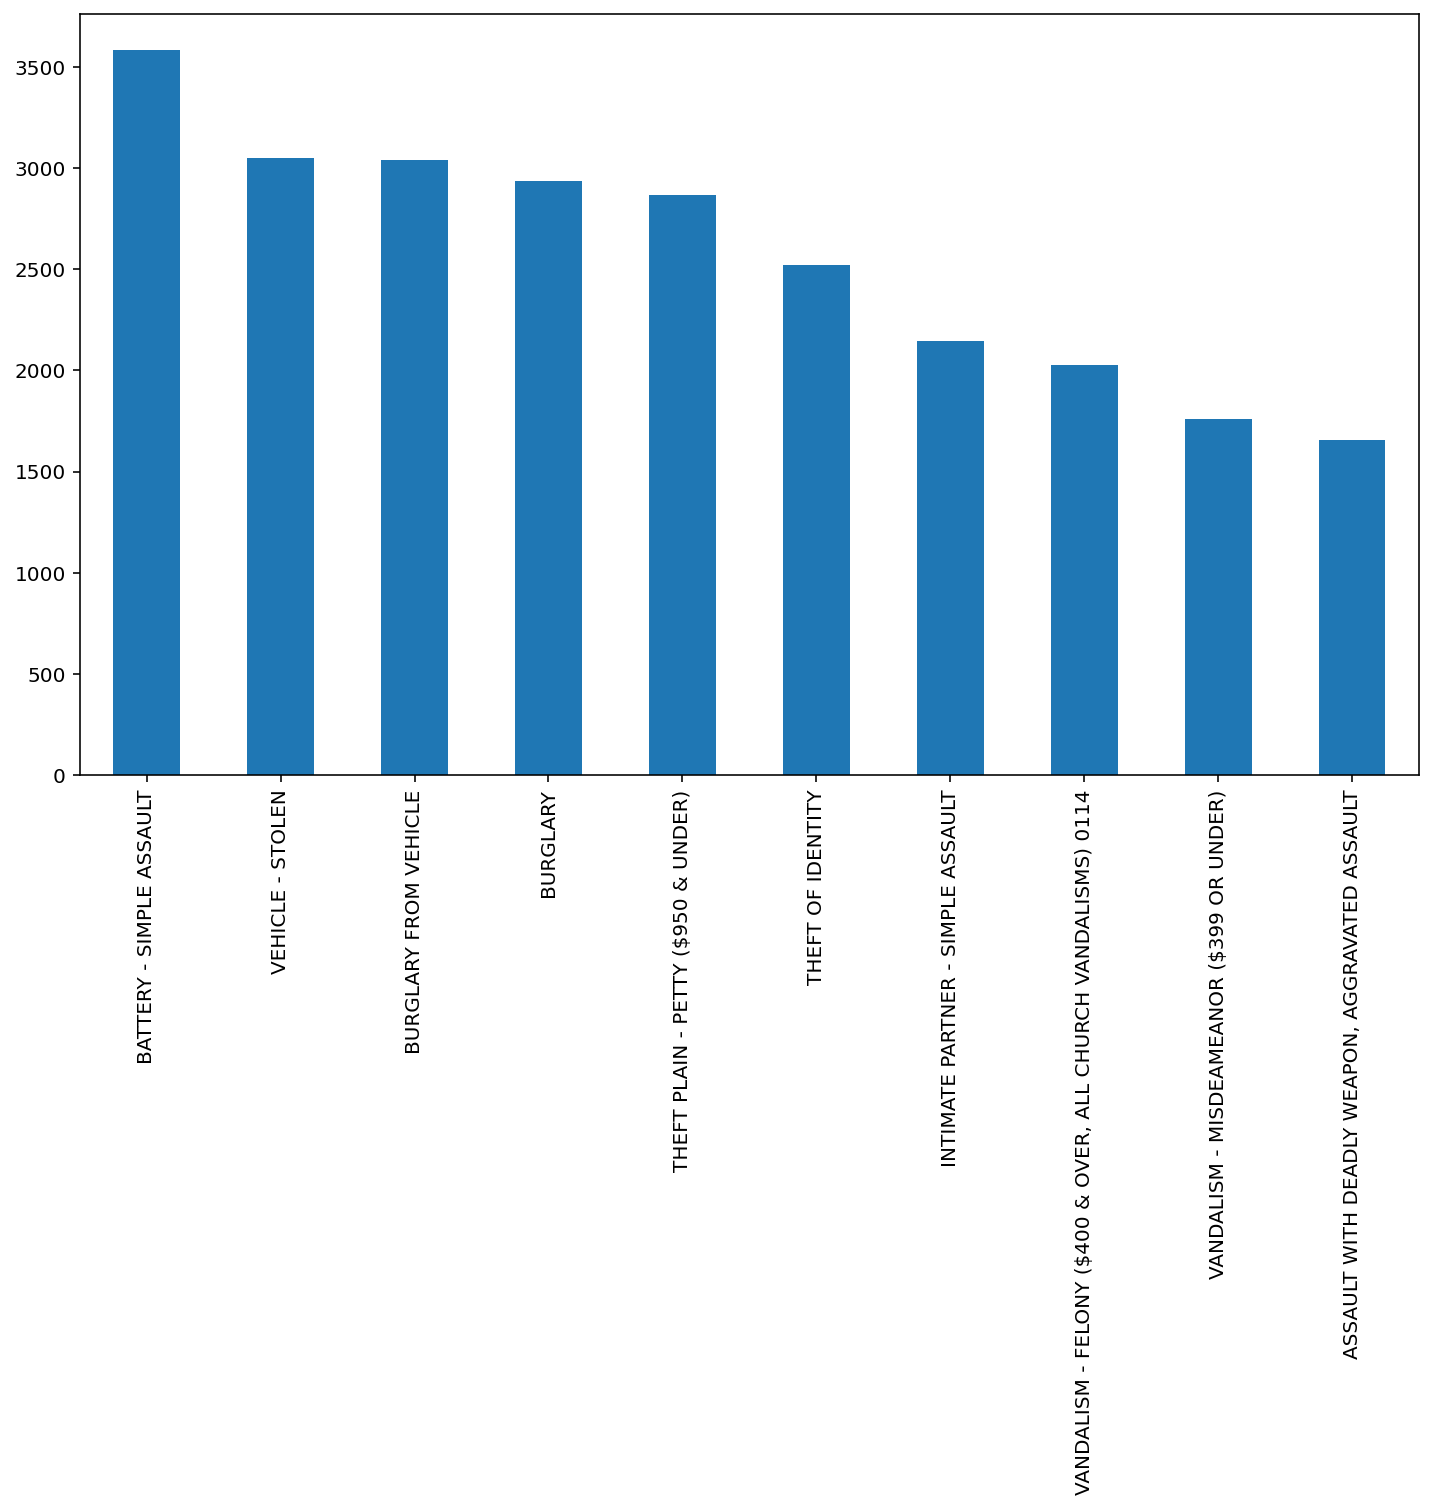

In [10]:
data["Crime Code Description"].value_counts().iloc[:10].plot(kind='bar')

In [11]:
male["Crime Code Description"].value_counts().head() #5 самых распространенных преступлений над мужчинами

BATTERY - SIMPLE ASSAULT              1731
BURGLARY FROM VEHICLE                 1665
BURGLARY                              1632
THEFT PLAIN - PETTY ($950 & UNDER)    1499
THEFT OF IDENTITY                     1262
Name: Crime Code Description, dtype: int64

In [12]:
female["Crime Code Description"].value_counts().head() #5 самых распространенных преступлений над женщинами

BATTERY - SIMPLE ASSAULT              1838
INTIMATE PARTNER - SIMPLE ASSAULT     1764
BURGLARY FROM VEHICLE                 1361
THEFT PLAIN - PETTY ($950 & UNDER)    1294
THEFT OF IDENTITY                     1251
Name: Crime Code Description, dtype: int64

In [87]:
data["Victim Descent"].value_counts().head() #Жертвы чаще Латиносы, потом Белые, потом Черные...

H    13488
W     9884
B     6449
O     3935
X     1028
Name: Victim Descent, dtype: int64

In [36]:
data["Area Name"].value_counts() #Все районы

77th Street    2752
Southwest      2633
N Hollywood    2192
Pacific        2100
Southeast      2086
Mission        2008
Northeast      1918
Van Nuys       1896
Devonshire     1873
Hollywood      1861
Newton         1806
Topanga        1762
Olympic        1758
Harbor         1724
West Valley    1683
Central        1652
West LA        1645
Rampart        1628
Wilshire       1587
Hollenbeck     1552
Foothill       1492
Name: Area Name, dtype: int64

In [30]:
danger = data["Area Name"].value_counts()[:5] #5 самых опасных районов
danger

77th Street    2752
Southwest      2633
N Hollywood    2192
Pacific        2100
Southeast      2086
Name: Area Name, dtype: int64

In [31]:
safe = data["Area Name"].value_counts()[-5:] #5 самых безопасных районов
safe

West LA       1645
Rampart       1628
Wilshire      1587
Hollenbeck    1552
Foothill      1492
Name: Area Name, dtype: int64

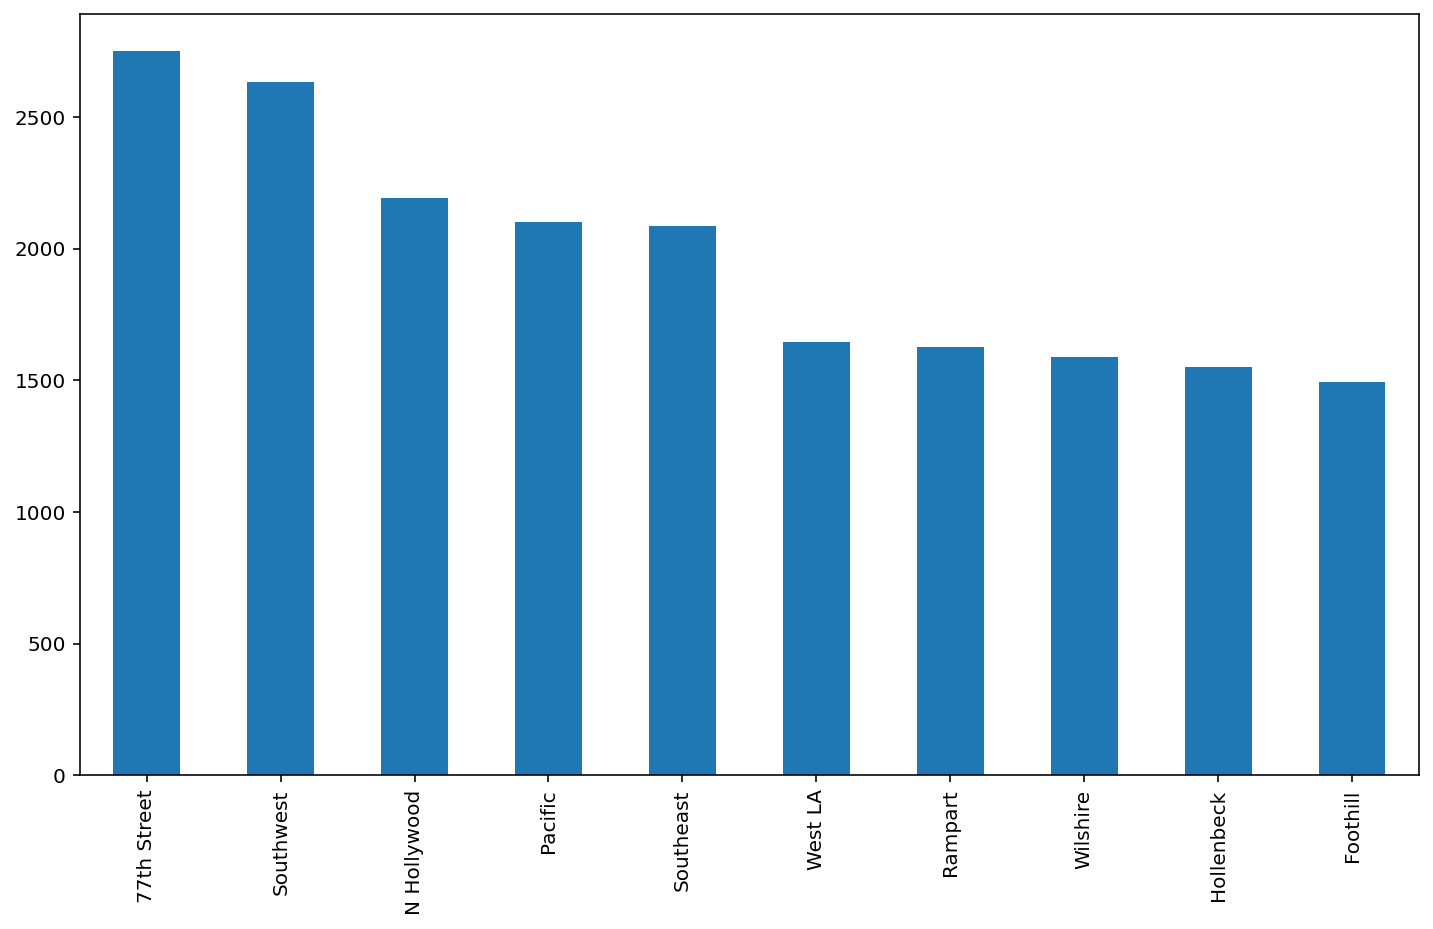

In [35]:
pd.concat([danger,safe]).plot(kind="bar")

In [224]:
# нормирование на общее количество жертв по каждому району
for area in data["Area Name"].unique():
    print("{:20} {:10}".format(area,((data[data["Area Name"]==area]["Victim Descent"].value_counts())/len(data[data["Area Name"]==area])).head(1).to_string()))

Harbor               H    0.390371
Mission              H    0.540837
Olympic              H    0.40273
Northeast            H    0.360792
Devonshire           W    0.388681
77th Street          B    0.477471
Central              H    0.302663
Van Nuys             W    0.357068
Rampart              H    0.520885
Hollywood            W    0.397098
Southwest            B    0.420433


Hollenbeck           H    0.624356
Pacific              W    0.464286
West LA              W    0.517325
N Hollywood          W    0.432938
Foothill             H    0.479223
West Valley          W    0.381462
Wilshire             W    0.340895
Topanga              W    0.400114
Newton               H    0.553156
Southeast            B    0.438159


In [225]:
# нормирование на общее количество жертв во всем датасете
for area in data["Area Name"].unique():
    print("{:20} {:10}".format(area,((data[data["Area Name"]==area]["Victim Descent"].value_counts())/len(data.index)).head(1).to_string()))

Harbor               H    0.016992
Mission              H    0.027419
Olympic              H    0.017875
Northeast            H    0.017471
Devonshire           W    0.01838
77th Street          B    0.033175
Central              H    0.012624
Van Nuys             W    0.017093
Rampart              H    0.02141
Hollywood            W    0.018658
Southwest            B    0.027949
Hollenbeck           H    0.024465
Pacific              W    0.024616
West LA              W    0.021486
N Hollywood          W    0.02396
Foothill             H    0.018052
West Valley          W    0.016209


Wilshire             W    0.013659
Topanga              W    0.017799
Newton               H    0.025222
Southeast            B    0.023076
